# Figure 3 Notebook


### Fig 3B,C - Isolated cell firing and during simulation

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


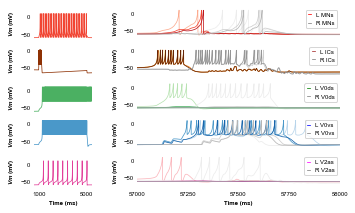

In [1]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

# Declare Figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(5, 2.8))

widths = [1, 3.5]
heights = [1,1,1, 1, 1]
gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)

# Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75
plt.rc('lines', linewidth=LINEWIDTH)  

SMALL_SIZE = 6

FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

# x range for step current response
x_start = 600
x_end = 5400

# x range for coiling simulation
xstart = 57000
xend = 58000

### END OF FIGURE SETUP ###

#FIRST, GRAPH VOLTAGE TRACES TO CURRENT STEP - FIGURE 3B#

from Izhikevich_class import*
from random import *
from Analysis_tools import *

tmax = 51000
dt = .1
nmax = int(tmax/dt)

 ## This model is based on Izhikevich neuron type:

#Increasing a makes the after current-step repolarization faster
#Increasing b depolarizes the resting membrane potential
#Decreasing d slows the return to rest (or complete inactivation of spking) during a step current.
#    Increasing d decreases the f-i slope
# b is inversely related to the input resistance
# a*b is related to the rate of the after current-step repolarization
# 

nrn = Izhikevich_9P(a=0.5,b=0.1,c=-50, d=100, vmax=10, vr=-60, vt=-50, k=0.05, Cm = 20, dt=dt, x=5.1+1.6,y=-1)

Time = [dt*t for t in range(nmax)]

# Declare MN response to current step subplot
fig_MN_firing = fig.add_subplot(gs[0, 0])

All_V_nrn = []
All_spike_times = []
All_inst_freq = []

#Current step parameters
Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    #plot MN response to current step
    fig_MN_firing.plot(Time, V_nrn, c=cmapRed(0.6))
            
fig_MN_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_firing.set_ylim([-70,30]) #y-axis limits
#Remove borders
fig_MN_firing.spines['top'].set_visible(False)
fig_MN_firing.spines['right'].set_visible(False)
fig_MN_firing.spines['bottom'].set_visible(False)
fig_MN_firing.spines['left'].set_visible(False)
#Tick parameters
fig_MN_firing.tick_params(axis='both', which='both', length=0)
fig_MN_firing.set_xticks([i*2000 for i in range(0,0)])
fig_MN_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_firing.title, fig_MN_firing.yaxis.label] +
         fig_MN_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_firing.set_xlim([x_start,x_end]) #x-axis limits

#Plot IC response to current step. Same set-up as MN response
nrn = nrn = Izhikevich_9P(a=0.0002,b=0.5,c=-40, d=5, vmax=0, vr=-60, vt=-45, k=0.3, Cm = 50, dt=dt, x=5.1+1.6,y=-1)

fig_IC_firing = fig.add_subplot(gs[1, 0]) 

Min_current = 40
Max_current = 42
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_IC_firing.plot(Time, V_nrn, c=cmapBrown(0.9))
            
fig_IC_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_firing.set_ylim([-80,20])
fig_IC_firing.spines['top'].set_visible(False)
fig_IC_firing.spines['right'].set_visible(False)
fig_IC_firing.spines['bottom'].set_visible(False)
fig_IC_firing.spines['left'].set_visible(False)
fig_IC_firing.tick_params(axis='both', which='both', length=0)
fig_IC_firing.set_xticks([i*2000 for i in range(0,0)])
fig_IC_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_firing.title, fig_IC_firing.yaxis.label] +
         fig_IC_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_firing.set_xlim([x_start,x_end])


#Plot V0d response to current step. Same set-up as MN response
nrn = Izhikevich_9P(a=0.02,b=0.1,c=-30, d=3.75, vmax=10, vr=-60, vt=-45, k=0.05, Cm = 20, dt=dt, x=5.1+1.6,y=-1)
fig_V0d_firing = fig.add_subplot(gs[2, 0]) 

Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V0d_firing.plot(Time, V_nrn, c=cmapGreen(0.6))
            
fig_V0d_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_firing.set_ylim([-70,30])
fig_V0d_firing.spines['top'].set_visible(False)
fig_V0d_firing.spines['right'].set_visible(False)
fig_V0d_firing.spines['bottom'].set_visible(False)
fig_V0d_firing.spines['left'].set_visible(False)
fig_V0d_firing.tick_params(axis='both', which='both', length=0)
fig_V0d_firing.set_xticks([i*2000 for i in range(0,0)])
fig_V0d_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0d_firing.title, fig_V0d_firing.yaxis.label] +
         fig_V0d_firing.get_xticklabels() + fig_V0d_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_firing.set_xlim([x_start,x_end])

#Plot V0v response to current step. Same set-up as MN response
nrn = Izhikevich_9P(a=0.02,b=0.1,c=-30, d=11.6, vmax=10, vr=-60, vt=-45, k=0.05, Cm = 20, dt=dt, x=5.1+1.6,y=-1)
fig_V0v_firing = fig.add_subplot(gs[3, 0]) 

Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V0v_firing.plot(Time, V_nrn, c=cmapBlue(0.6))
            
fig_V0v_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_firing.set_ylim([-80,20])
fig_V0v_firing.spines['top'].set_visible(False)
fig_V0v_firing.spines['right'].set_visible(False)
fig_V0v_firing.spines['bottom'].set_visible(False)
fig_V0v_firing.spines['left'].set_visible(False)
fig_V0v_firing.tick_params(axis='both', which='both', length=0)
fig_V0v_firing.set_xticks([i*2000 for i in range(0,0)])
fig_V0v_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_firing.title, fig_V0v_firing.yaxis.label] +
         fig_V0v_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_firing.set_xlim([x_start,x_end])

#Plot V2a response to current step. Same set-up as MN response
nrn = Izhikevich_9P(a=0.5,b=0.1,c=-50, d=100, vmax=10, vr=-60, vt=-45, k=0.05, Cm = 20, dt=dt, x=5.1+1.6,y=-1)
fig_V2a_firing = fig.add_subplot(gs[4, 0]) 

Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V2a_firing.plot(Time, V_nrn, c=cmapRedPurple(0.6))
            
fig_V2a_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_firing.set_ylim([-70,30])
fig_V2a_firing.spines['top'].set_visible(False)
fig_V2a_firing.spines['right'].set_visible(False)
fig_V2a_firing.spines['bottom'].set_visible(False)
fig_V2a_firing.spines['left'].set_visible(False)
fig_V2a_firing.tick_params(axis='both', which='both', length=0)
fig_V2a_firing.set_xticks([i*4000 + 1000 for i in range(0,3)])
fig_V2a_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_firing.title, fig_V2a_firing.yaxis.label] +
         fig_V2a_firing.get_xticklabels() + fig_V2a_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_firing.set_xlim([x_start,x_end])
fig_V2a_firing.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE)

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION - FIGURE 3C ###
# This file contains the simulation output of the base model for double coiling
# Read this data file
read_data = pd.read_csv("Double_coiling_100000ms.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# Declare which traces to plot for every cell type
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0, 2, 4] # Plot IC[0, 2 and 4]
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# y-axis limits
lower_y = -80
upper_y = 20

#Declare subplots
fig_MN_activity = fig.add_subplot(gs[0, 1])
fig_IC_activity = fig.add_subplot(gs[1, 1])
fig_V0d_activity = fig.add_subplot(gs[2, 1])
fig_V0v_activity = fig.add_subplot(gs[3, 1])
fig_V2a_activity = fig.add_subplot(gs[4, 1])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
#Legend set-up
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
#Remove borders
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#Tick parameters
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([i*5000 for i in range(0,0)])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces. Same set-up as MN plot
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([i*5000 for i in range(0,0)])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V0d traces. Same set-up as MN plot
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
fig_V0d_activity.set_xticks([i*5000 for i in range(0,0)])
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_xlim([xstart, xend])

# plotting V0v traces. Same set-up as MN plot
for k in list_V0vs:
    lines_left, = fig_V0v_activity.plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0v_activity.plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2), linestyle='-')
leg=fig_V0v_activity.legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0v_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_activity.set_ylim([lower_y, upper_y])
fig_V0v_activity.spines['top'].set_visible(False)
fig_V0v_activity.spines['right'].set_visible(False)
fig_V0v_activity.spines['bottom'].set_visible(False)
fig_V0v_activity.spines['left'].set_visible(False)
fig_V0v_activity.tick_params(axis='both', which='both', length=0)
fig_V0v_activity.set_xticks([i*5000 for i in range(0,0)])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_activity.title, fig_V0v_activity.xaxis.label, fig_V0v_activity.yaxis.label] +
         fig_V0v_activity.get_xticklabels() + fig_V0v_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_activity.set_xlim([xstart, xend])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V2a traces. Same set-up as MN plot
for k in list_V2as:
    lines_left, = fig_V2a_activity.plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a),linestyle='-', linewidth=LINEWIDTH) # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V2a_activity.plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-',  linewidth=LINEWIDTH)
leg=fig_V2a_activity.legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V2a_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_ylim([lower_y, upper_y])
fig_V2a_activity.spines['top'].set_visible(False)
fig_V2a_activity.spines['right'].set_visible(False)
fig_V2a_activity.spines['bottom'].set_visible(False)
fig_V2a_activity.spines['left'].set_visible(False)
fig_V2a_activity.tick_params(axis='both', which='both', length=0)
fig_V2a_activity.set_xticks([i*250 for i in range(228,233)])
fig_V2a_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_activity.title, fig_V2a_activity.xaxis.label, fig_V2a_activity.yaxis.label] +
         fig_V2a_activity.get_xticklabels() + fig_V2a_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_xlim([xstart, xend])

plt.subplots_adjust(hspace = 0.075, wspace = 0.35, left = 0.1, right = 0.95, top = 1, bottom = 0.1)
plt.savefig("Double_coiling_steps_and_activity.png", dpi=1000)
plt.show()

### Figure 3D - phase delays (takes a long time to run)

VLMN vs VRMN: -0.1412 -208.3 1.0
VLMN vs VLIC: 0.0657 97.0 1.0
VLMN vs VRIC: -0.0758 -111.8 1.0
VLMN vs VLV0d: 0.0258 38.1 1.0
VLMN vs VRV0d: -0.1469 -216.8 1.0
VLMN vs VLV0v: -0.0262 -38.7 1.0
VLMN vs VRV0v: -0.1751 -258.3 1.0
VLMN vs VLV2a: 0.0057 8.4 1.0
VLMN vs VRV2a: -0.158 -233.1 1.0
VLIC vs VLMN: 0.0057 8.4 1.0
VLIC vs VRMN: -0.2659 -392.2 1.0
VLIC vs VRIC: -0.1571 -231.7 1.0
VLIC vs VLV0d: -0.0437 -64.4 1.0
VLIC vs VRV0d: -0.2328 -343.4 1.0
VLIC vs VLV0v: 5.9671 8802.9 1.0
VLIC vs VRV0v: -0.2479 -365.7 1.0
VLIC vs VLV2a: -0.0637 -93.9 1.0
VLIC vs VRV2a: -0.267 -393.9 1.0
VLV0d vs VLMN: -0.0637 -93.9 1.0
VLV0d vs VRMN: -0.2043 -301.0 1.0
VLV0d vs VLIC: 0.0437 64.4 1.0
VLV0d vs VRIC: -0.1151 -169.5 1.0
VLV0d vs VRV0d: -0.1729 -254.7 1.0
VLV0d vs VLV0v: -0.0488 -71.9 1.0
VLV0d vs VRV0v: -0.1849 -272.3 1.0
VLV0d vs VLV2a: -0.0134 -19.8 1.0
VLV0d vs VRV2a: -0.1885 -277.7 1.0
VLV0v vs VLMN: -0.0134 -19.8 1.0
VLV0v vs VRMN: -0.0852 -125.7 1.0
VLV0v vs VLIC: -5.9673 -8802.9 1.0
VLV0v v

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


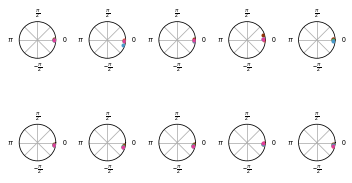

In [2]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

# This file contains the simulation output of the base model for double coiling
# Read this data file
read_data = pd.read_csv("Double_coiling_100000ms.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


# This function returns the time delay in radians or in time as well as the maximum value of the cross-correlation
def compute_tmax(trace_1, trace_2, lim_t=15000, dt=0.1):
    trace_1 = trace_1 - mean(trace_1)
    trace_2 = trace_2 - mean(trace_2)
    Xc_res = Xcorr_LR(trace_1, trace_2)
    N = int(len(Xc_res)/2)
    Xc_res = Xc_res[int(N-lim_t/dt):int(N+lim_t/dt)]
    time_delay = np.arange(-lim_t, lim_t, dt)

    Xa_res = autocorr(trace_1)
    Xa_res = Xa_res[int(3000/dt):int(lim_t/dt)]
    time_delay_a = np.arange(3000, lim_t, dt)

    idx = np.where(Xc_res == np.max(Xc_res))[0][0] 

    idx_a = np.where(Xa_res == np.max(Xa_res))[0][0] 
    t_max_a = round(time_delay_a[idx_a], 2) 

    duration_single_coiling = 1891 # as determined in the block of code below
    
    Xc_max = round(np.max(Xc_res), 4) # calculate the value of the max cross correlation
    t_max = round(time_delay[idx], 2) #calculate the value of the phase delay
    t_max_rad = round(2*np.pi * t_max / duration_single_coiling, 4) #calculate the phase delay in radians
    
    return t_max_rad, t_max, Xc_max

%matplotlib inline

phase_delay_ipsi_coll = []
phase_delay_contra_coll = []
res_ipsi = []
res_contra = []

res_contra = compute_tmax(VLMN[4], VRMN[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VRMN: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLMN[4], VLIC[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VLIC: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLMN[4], VRIC[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VRIC: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLMN[4], VLV0d[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VLV0d: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLMN[4], VRV0d[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VRV0d: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLMN[4], VLV0v[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VLV0v: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLMN[4], VRV0v[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VRV0v: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLMN[4], VLV2a[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VLV2a: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLMN[4], VRV2a[4], lim_t = 15000, dt = 0.1)
print("VLMN vs VRV2a: "  + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_contra = compute_tmax(VLIC[4], VLMN[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VLMN: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLIC[4], VRMN[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VRMN: "  + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_contra = compute_tmax(VLIC[4], VRIC[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VRIC: "  + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLIC[4], VLV0d[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VLV0d: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLIC[4], VRV0d[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VRV0d: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLIC[4], VLV0v[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VLV0v: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLIC[4], VRV0v[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VRV0v: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLIC[4], VLV2a[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VLV2a: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLIC[4], VRV2a[4], lim_t = 15000, dt = 0.1)
print("VLIC vs VRV2a: "  + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))


res_contra = compute_tmax(VLV0d[4], VLMN[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VLMN: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0d[4], VRMN[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VRMN: "  + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV0d[4], VLIC[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VLIC: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0d[4], VRIC[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VRIC: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_contra = compute_tmax(VLV0d[4], VRV0d[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VRV0d: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV0d[4], VLV0v[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VLV0v: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0d[4], VRV0v[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VRV0v: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV0d[4], VLV2a[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VLV2a: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0d[4], VRV2a[4], lim_t = 15000, dt = 0.1)
print("VLV0d vs VRV2a: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))


res_contra = compute_tmax(VLV0v[4], VLMN[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VLMN: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0v[4], VRMN[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VRMN: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV0v[4], VLIC[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VLIC: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0v[4], VRIC[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VRIC: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV0v[4], VLV0d[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VLV0d: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0v[4], VRV0d[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VRV0d: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_contra = compute_tmax(VLV0v[4], VRV0v[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VRV0v: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV0v[4], VLV2a[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VLV2a: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV0v[4], VRV2a[4], lim_t = 15000, dt = 0.1)
print("VLV0v vs VRV2a: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))


res_contra = compute_tmax(VLV2a[4], VLMN[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VLMN: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV2a[4], VRMN[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VRMN: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV2a[4], VLIC[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VLIC: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV2a[4], VRIC[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VRIC: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV2a[4], VLV0d[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VLV0d: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV2a[4], VRV0d[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VRV0d: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_ipsi = compute_tmax(VLV2a[4], VLV0v[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VLV0v: " + str(res_ipsi[0]) + " " + str(res_ipsi[1]) + " " + str(res_ipsi[2]))
res_contra = compute_tmax(VLV2a[4], VRV0v[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VRV0v: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_ipsi_coll.append(np.asarray(res_ipsi))
phase_delay_contra_coll.append(np.asarray(res_contra))

res_contra = compute_tmax(VLV2a[4], VRV2a[4], lim_t = 15000, dt = 0.1)
print("VLV2a vs VRV2a: " + str(res_contra[0]) + " " + str(res_contra[1]) + " " + str(res_contra[2]))

phase_delay_contra_coll.append(np.asarray(res_contra))


### Prepare Figure ###
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

def plot_polar_phase_somite10(ax, res, cmap,i):
    
    #for i,(x,y) in enumerate(zip(res[:,0], res[:,2])):
    ax.plot(res[0], res[2], 'o', c=cmap, alpha=1, markersize = 3, zorder = 3)

    # ax.plot(np.mean(res[:,0]), np.mean(res[:,2]), 'o')

    xL=['0',' ', r'$\frac{\pi}{2}$', ' ', r'$\pi$', ' ', r'$-\frac{\pi}{2}$',' ', ]
    ax.set_xticklabels(xL, fontsize = 8)
    ax.set_yticks([.5, 1.])
    ax.set_yticklabels([.5, 1.],fontsize = 8)
    
    return ax

#let's plot!

cmapIC = matplotlib.cm.get_cmap('YlOrBr')
cmapMN = matplotlib.cm.get_cmap('Reds')
cmapV0d = matplotlib.cm.get_cmap('Greens')
cmapV0v = matplotlib.cm.get_cmap('Blues')
cmapV2a = matplotlib.cm.get_cmap('RdPu')

cmaps= [cmapMN(0.6), cmapIC(0.9), cmapV0d(0.6), cmapV0v(0.6), cmapV2a(0.6)]

col_index = 0

fig, ax = plt.subplots(2, 5, subplot_kw={'projection': 'polar'}, figsize=(5,3))

color_indices_ipsi=[[1,2,3,4],[0,2,3,4], [0,1,3,4], [0,1,3,4], [0,1,2,3]]
color_indices_contra=[[1,2,3,4],[0,2,3,4], [0,1,3,4], [0,1,3,4], [0,1,2,3]]

for i, phase_delay_ipsi in enumerate(phase_delay_ipsi_coll):
    col_index = i // 4
    color_index  = color_indices_ipsi[col_index][i%4]
    ax[0,col_index] = plot_polar_phase_somite10(ax[0,col_index], phase_delay_ipsi, cmaps[color_index],color_index)
    #ax[col_index] = plot_polar_phase_somite10(ax[col_index], phase_delay_ipsi, cmaps[color_index],color_index)
    ax[0, col_index].tick_params(axis='x', labelsize= 7, pad= -2)

for i, phase_delay_contra in enumerate(phase_delay_contra_coll):
    col_index = i // 5
    color_index  = i % 5
    ax[1, col_index] = plot_polar_phase_somite10(ax[1, col_index], phase_delay_contra, cmaps[color_index],color_index)
    #ax[col_index] = plot_polar_phase_somite10(ax[col_index], phase_delay_contra, cmaps[color_index],color_index)
    ax[1, col_index].tick_params(axis='x', labelsize= 7, pad = -2)

labels = ['MN', 'IC', 'V0d', 'V0v', 'V2a']
for i, lbl_0 in enumerate(labels):

    ax[0, i].set_rticks([])
    ax[1, i].set_rticks([])    
    
plt.tight_layout()
plt.savefig("Phase_delays_Double_Coiling.png", dpi=1000)
plt.show()

### Figure 3E - Overexpression of V0v

In [ ]:

%matplotlib inline
# Import pandas for data saving
import pandas as pd
import numpy as np
from Analysis_tools import *
from pylab import *

# This file was used to make the figure for all of the neuron traces during a typical double coil
# First, read data file
read_data = pd.read_csv("Double_coiling_V0v_excitation_too_strong_and_too_early.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# Declare traces for each cell type to be plotted
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0, 2, 4] # Plot IC[0, 2 and 4]
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# Declare color maps
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
    
# Declare Figure
fig, ax = plt.subplots(5,1, sharex=True, figsize=(1.5, 2.7))

#Declare font sizes
TINY_SIZE= 6
SMALL_SIZE = 5
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH) 

# Declare y-axis limits
lower_y = -80
upper_y = 20

# Y-axis labels and limits
for i in range (0,5):
    ax[i].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    ax[i].set_ylim([lower_y, upper_y])
    for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
         ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)

    # remove borders and set tick parameters

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    
# plotting motoneuron traces
for k in list_MNs:
    lines_left, = ax[0].plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = ax[0].plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
# set up legend
leg=ax[0].legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)


# plotting IC
for k in list_ICs:
    lines_left, = ax[1].plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') 
    lines_right, = ax[1].plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=ax[1].legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V0d
for k in list_V0ds:
    lines_left, = ax[2].plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d), linestyle='-') 
    lines_right, = ax[2].plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
# set up legend
leg=ax[2].legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V0v
for k in list_V0vs:
    lines_left, = ax[3].plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v)) 
    lines_right, = ax[3].plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2))
# set up legend
leg=ax[3].legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V2a
for k in list_V2as:
    lines_left, = ax[4].plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a), linestyle='-') 
    lines_right, = ax[4].plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-')
# set up legend
leg=ax[4].legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)
    
plt.xlabel('Time (ms)', fontsize=SMALL_SIZE, fontweight = FONT_STYLE) #x-axis title
plt.xlim([10900, 11400])

ax[0].set_xticks([11000, 11300])
plt.subplots_adjust(hspace = 0.075, left = 0.25, right = 0.95, top = 1, bottom = 0.1)
plt.savefig('V0v_activation_too_early_double_Coiling.png', dpi=1000)
plt.show()

### Figure 3F - Glutamate null

In [ ]:
# Import pandas for data saving
import pandas as pd
read_data = pd.read_csv("Double_coiling_Sim_data_Dec_6_2020_Run3.csv")

read_data = read_data.rename(columns={'Left_CoLA0': 'Left_V0d0', 'Left_CoLA1': 'Left_V0d1', 'Left_CoLA2': 'Left_V0d2', 'Left_CoLA3': 'Left_V0d3', 'Left_CoLA4': 'Left_V0d4', 
'Left_CoLA5': 'Left_V0d5', 'Left_CoLA6': 'Left_V0d6', 'Left_CoLA7': 'Left_V0d7', 'Left_CoLA8': 'Left_V0d8', 'Left_CoLA9': 'Left_V0d9'}) 
read_data = read_data.rename(columns={'Left_CiD0': 'Left_V2a0', 'Left_CiD1': 'Left_V2a1', 'Left_CiD2': 'Left_V2a2', 'Left_CiD3': 'Left_V2a3', 'Left_CiD4': 'Left_V2a4', 
'Left_CiD5': 'Left_V2a5', 'Left_CiD6': 'Left_V2a6', 'Left_CiD7': 'Left_V2a7', 'Left_CiD8': 'Left_V2a8', 'Left_CiD9': 'Left_V2a9'}) 
read_data = read_data.rename(columns={'Left_CoE0': 'Left_V0v0', 'Left_CoE1': 'Left_V0v1', 'Left_CoE2': 'Left_V0v2', 'Left_CoE3': 'Left_V0v3', 'Left_CoE4': 'Left_V0v4', 
'Left_CoE5': 'Left_V0v5', 'Left_CoE6': 'Left_V0v6', 'Left_CoE7': 'Left_V0v7', 'Left_CoE8': 'Left_V0v8', 'Left_CoE9': 'Left_V0v9'}) 

In [ ]:
read_data.to_csv('Double_coiling_base_model_100000ms.csv', index=False)

In [ ]:

%matplotlib inline
# Import pandas for data saving
import pandas as pd
import numpy as np
from Analysis_tools import *
from pylab import *

# This file was used to make the figure for all of the neuron traces during a typical double coil
# First, read data file
read_data = pd.read_csv("Double_coiling_no_glutamate.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# Declare traces for each cell type to be plotted
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0, 2, 4] # Plot IC[0, 2 and 4]
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# Declare color maps
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
    
# Declare Figure
fig, ax = plt.subplots(5,1, sharex=True, figsize=(1.5, 2.7))

#Declare font sizes
TINY_SIZE= 6
SMALL_SIZE = 5
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH) 

# Declare y-axis limits
lower_y = -80
upper_y = 20

# Y-axis labels and limits
for i in range (0,5):
    ax[i].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    ax[i].set_ylim([lower_y, upper_y])
    for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
         ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)

    # remove borders and set tick parameters

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    
# plotting motoneuron traces
for k in list_MNs:
    lines_left, = ax[0].plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = ax[0].plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
# set up legend
leg=ax[0].legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)


# plotting IC
for k in list_ICs:
    lines_left, = ax[1].plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') 
    lines_right, = ax[1].plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=ax[1].legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V0d
for k in list_V0ds:
    lines_left, = ax[2].plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d), linestyle='-') 
    lines_right, = ax[2].plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
# set up legend
leg=ax[2].legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V0v
for k in list_V0vs:
    lines_left, = ax[3].plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v)) 
    lines_right, = ax[3].plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2))
# set up legend
leg=ax[3].legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V2a
for k in list_V2as:
    lines_left, = ax[4].plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a), linestyle='-') 
    lines_right, = ax[4].plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-')
# set up legend
leg=ax[4].legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)
    
plt.xlabel('Time (ms)', fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
plt.xlim([0, TIME_END])
plt.xlim([18500, 19100])

ax[0].set_xticks([18600, 18900])
plt.subplots_adjust(hspace = 0.075, left = 0.25, right = 0.95, top = 1, bottom = 0.1)
plt.savefig('No_glutamate_double_coiling.png', dpi=1000)
plt.show()



### Figure 3G - Glycine null

In [ ]:
%matplotlib inline
# Import pandas for data saving
import pandas as pd
import numpy as np
from Analysis_tools import *
from pylab import *

# This file was used to make the figure for all of the neuron traces during double coiling without glycine
read_data = pd.read_csv("Double_coiling_glycine_null.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# Declare traces for each cell type to be plotted
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0, 2, 4] # Plot IC[0, 2 and 4]
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# Declare color maps
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
    
# Declare Figure
fig, ax = plt.subplots(5,1, sharex=True, figsize=(1.5, 2.7))

#Declare font sizes
TINY_SIZE= 6
SMALL_SIZE = 5
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH) 

# Declare y-axis limits
lower_y = -80
upper_y = 20

# Y-axis labels and limits
for i in range (0,5):
    ax[i].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    ax[i].set_ylim([lower_y, upper_y])
    for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
         ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)

    # remove borders and set tick parameters

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    
# plotting motoneuron traces
for k in list_MNs:
    lines_left, = ax[0].plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = ax[0].plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
# set up legend
leg=ax[0].legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)


# plotting IC
for k in list_ICs:
    lines_left, = ax[1].plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') 
    lines_right, = ax[1].plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=ax[1].legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V0d
for k in list_V0ds:
    lines_left, = ax[2].plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d), linestyle='-') 
    lines_right, = ax[2].plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
# set up legend
leg=ax[2].legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V0v
for k in list_V0vs:
    lines_left, = ax[3].plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v)) 
    lines_right, = ax[3].plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2))
# set up legend
leg=ax[3].legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting V2a
for k in list_V2as:
    lines_left, = ax[4].plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a), linestyle='-') 
    lines_right, = ax[4].plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-')
# set up legend
leg=ax[4].legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE-1)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)
    
plt.xlabel('Time (ms)', fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
plt.xlim([0, TIME_END])
plt.xlim([17500, 18900])

ax[0].set_xticks([18000, 18500])
plt.subplots_adjust(hspace = 0.075, left = 0.25, right = 0.95, top = 1, bottom = 0.1)
plt.savefig('All_neurons_triple_coiling.png', dpi=1000)
plt.show()

### Figure 3H SB-PD

In [ ]:
%matplotlib inline
# Import pandas for data saving
import pandas as pd
import numpy as np
from Analysis_tools import *
from pylab import *


# This file was used to make the figure for all of the neuron traces during double coiling with one neuron hyperpolarized
#Read data file
read_data = pd.read_csv("Double_coiling_Sim_data_Dec_7_2020_Run1.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#List traces for each cell to display
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [int(nIC*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

#Color maps
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
    
fig, ax = plt.subplots(2,1, sharex=True, figsize=(1.75, 1.75)) 
SMALL_SIZE = 7
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Remove borders
for i in range (0,2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    ax[i].set_xticks([i*1000 for i in range(0,50)])
    
#Set ticks for x- and y-axis
ax[0].set_yticks([i*10 + -65 for i in range(0,2)])
ax[1].set_yticks([i*50 + -50 for i in range(0,2)])


# plotting motoneuron traces

lines_left, = ax[0].plot(Time, VLMN[4,:], c=cmapRed((6+1)/nMN), label='_nolegend_') # adding a color gradient, lighter color -> rostrally located
ax[0].legend(handles=[lines_left], labels=['L MN'], loc='upper right', fontsize = SMALL_SIZE-1, handlelength = 0.5)

ax[0].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
ax[1].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title

ax[0].set_ylim([-70,-50]) #y-axis limit
ax[1].set_ylim([-70, 20]) #y-axis limit

# plotting IC and V0d traces

lines_left, = ax[1].plot(Time, VLIC[0,:], c=cmapBrown((8)/nIC), label='_nolegend_')
lines_right, = ax[1].plot(Time, VRV0d[3,:], c=cmapGreen((8)/nV0d), label='_nolegend_')
ax[1].legend(handles=[lines_left, lines_right], labels=['L IC','R V0d'], loc='upper right', fontsize = SMALL_SIZE-1, handlelength = 0.5)

for item in (ax[1].get_xticklabels() + ax[1].get_yticklabels()+ax[0].get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)

plt.xlabel('Time (ms)', fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
plt.xlim([41500, 43000])
plt.tight_layout()
plt.savefig("SD_PD_double_coiling.png", dpi = 1000)
plt.show()

### Figure 3H - PD or SD events in simulations with no glutamatergic synapses (right panel)

In [ ]:
%matplotlib inline
# Import pandas for data saving
import pandas as pd
import numpy as np
from Analysis_tools import *
from pylab import *


# This file was used to make the figure for all of the neuron traces during double coiling with one neuron hyperpolarized
#Read data file
read_data = pd.read_csv("Double_coiling_glut_null_hyperpolarized_MN.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#Declare color maps
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')

#Declare Figure
fig, ax = plt.subplots(2,1, sharex=True, figsize=(1.75, 1.75)) 

#Font sizes
SMALL_SIZE = 7
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#Declare line width
LINEWIDTH = 0.75
plt.rc('lines', linewidth=LINEWIDTH) 

#Remove borders, declare tick parameters
for i in range (0,2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    ax[i].set_xticks([10000, 12000])

ax[0].set_yticks([i*10 + -65 for i in range(0,2)])
ax[1].set_yticks([i*50 + -50 for i in range(0,2)])


# plotting motoneuron traces

lines_left, = ax[0].plot(Time, VLMN[4,:], c=cmapRed((6+1)/nMN), label='_nolegend_') # adding a color gradient, lighter color -> rostrally located
ax[0].legend(handles=[lines_left], labels=['L MN'], loc='upper right', fontsize = SMALL_SIZE-1, handlelength = 0.5)

ax[0].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis titles
ax[1].set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis titles

ax[0].set_ylim([-70,-50]) #y-axis limit
ax[1].set_ylim([-70, 20]) #y-axis limit

# plotting IC and V0d traces

lines_left, = ax[1].plot(Time, VLIC[0,:], c=cmapBrown((8)/nIC), label='_nolegend_')
lines_right, = ax[1].plot(Time, VRV0d[3,:], c=cmapGreen((8)/nV0d), label='_nolegend_')
ax[1].legend(handles=[lines_left, lines_right], labels=['L IC','R V0d'], loc='upper right', fontsize = SMALL_SIZE-1, handlelength = 0.5)

for item in (ax[1].get_xticklabels() + ax[1].get_yticklabels()+ax[0].get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)

plt.xlabel('Time (ms)', fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
plt.xlim([9000, 12000])
plt.tight_layout()
plt.savefig("SD_PD_glut_null_double_coiling.png", dpi = 1000)
plt.show()

### Figure 3 - figure supplement 1A (V2a to V0v)

In [ ]:
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

#Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(5, 2.8))

widths = [1, 3.5]
heights = [1,1,1, 1, 1]
gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH)  

#font size
SMALL_SIZE = 6

FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

# x range for step current response
x_start = 600
x_end = 5400

# x range for coiling simulation
xstart = 0
xend = 50000

### END OF FIGURE SETUP ###

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
#Read data file with simulation results
read_data = pd.read_csv("Double_coiling_V2a_KO.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#Declare traces to be plotted for each cell type
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [int(nIC*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

#y-axis limits
lower_y = -80
upper_y = 20

#Declare subplots
fig_MN_activity = fig.add_subplot(gs[0, 1])
fig_IC_activity = fig.add_subplot(gs[1, 1])
fig_V0d_activity = fig.add_subplot(gs[2, 1])
fig_V0v_activity = fig.add_subplot(gs[3, 1])
fig_V2a_activity = fig.add_subplot(gs[4, 1])

nMN = len(VLMN[:,0])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
#legend set-up
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
#Remove borders
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#Tick parameters
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces, setup is the same as for MNs
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V0d traces, setup is the same as for MNs
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
fig_V0d_activity.set_xticks([])
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_xlim([xstart, xend])

# plotting V0v traces, setup is the same as for MNs
for k in list_V0vs:
    lines_left, = fig_V0v_activity.plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0v_activity.plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2), linestyle='-')
leg=fig_V0v_activity.legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0v_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_activity.set_ylim([lower_y, upper_y])
fig_V0v_activity.spines['top'].set_visible(False)
fig_V0v_activity.spines['right'].set_visible(False)
fig_V0v_activity.spines['bottom'].set_visible(False)
fig_V0v_activity.spines['left'].set_visible(False)
fig_V0v_activity.tick_params(axis='both', which='both', length=0)
fig_V0v_activity.set_xticks([])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_activity.title, fig_V0v_activity.xaxis.label, fig_V0v_activity.yaxis.label] +
         fig_V0v_activity.get_xticklabels() + fig_V0v_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_activity.set_xlim([xstart, xend])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V2a traces, setup is the same as for MNs
for k in list_V2as:
    lines_left, = fig_V2a_activity.plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a),linestyle='-', linewidth=LINEWIDTH) # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V2a_activity.plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-',  linewidth=LINEWIDTH)
leg=fig_V2a_activity.legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V2a_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_ylim([lower_y, upper_y])
fig_V2a_activity.spines['top'].set_visible(False)
fig_V2a_activity.spines['right'].set_visible(False)
fig_V2a_activity.spines['bottom'].set_visible(False)
fig_V2a_activity.spines['left'].set_visible(False)
fig_V2a_activity.tick_params(axis='both', which='both', length=0)
fig_V2a_activity.set_xticks([i*10000 for i in range(0,6)])
fig_V2a_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_activity.title, fig_V2a_activity.xaxis.label, fig_V2a_activity.yaxis.label] +
         fig_V2a_activity.get_xticklabels() + fig_V2a_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_xlim([xstart, xend])

plt.subplots_adjust(hspace = 0.075, wspace = 0.35, left = 0.1, right = 0.95, top = 1, bottom = 0.1)
plt.savefig("Double_coiling_V2a_null.png", dpi=1000)
plt.show()

## Figure 3 - figure supplement 1B (No V0v to IC during no V0d)

In [ ]:
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###
#Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(5, 2.8))

widths = [1, 3.5]
heights = [1,1,1, 1, 1]
gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)

# declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH)  

#declare font size and style
SMALL_SIZE = 6

FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

# x range for step current response
x_start = 600
x_end = 5400

# x range for coiling simulation
xstart = 0
xend = 50000

### END OF FIGURE SETUP ###

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
#Read data file containing sim results
read_data = pd.read_csv("Double_coiling_no_V0v_to_IC_and_no_V0d_syn.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#Declare traces to be plotted for each cell type
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [int(nIC*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

#y-axis limits
lower_y = -80
upper_y = 20

#Declare subplots
fig_MN_activity = fig.add_subplot(gs[0, 1])
fig_IC_activity = fig.add_subplot(gs[1, 1])
fig_V0d_activity = fig.add_subplot(gs[2, 1])
fig_V0v_activity = fig.add_subplot(gs[3, 1])
fig_V2a_activity = fig.add_subplot(gs[4, 1])

nMN = len(VLMN[:,0])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
#legend set-up
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
#Remove borders
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#Tick parameters
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces, setup is the same as for MNs
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V0d traces, setup is the same as for MNs
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
fig_V0d_activity.set_xticks([])
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_xlim([xstart, xend])

# plotting V0v traces, setup is the same as for MNs
for k in list_V0vs:
    lines_left, = fig_V0v_activity.plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0v_activity.plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2), linestyle='-')
leg=fig_V0v_activity.legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0v_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_activity.set_ylim([lower_y, upper_y])
fig_V0v_activity.spines['top'].set_visible(False)
fig_V0v_activity.spines['right'].set_visible(False)
fig_V0v_activity.spines['bottom'].set_visible(False)
fig_V0v_activity.spines['left'].set_visible(False)
fig_V0v_activity.tick_params(axis='both', which='both', length=0)
fig_V0v_activity.set_xticks([])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_activity.title, fig_V0v_activity.xaxis.label, fig_V0v_activity.yaxis.label] +
         fig_V0v_activity.get_xticklabels() + fig_V0v_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_activity.set_xlim([xstart, xend])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V2a traces, setup is the same as for MNs
for k in list_V2as:
    lines_left, = fig_V2a_activity.plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a),linestyle='-', linewidth=LINEWIDTH) # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V2a_activity.plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-',  linewidth=LINEWIDTH)
leg=fig_V2a_activity.legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V2a_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_ylim([lower_y, upper_y])
fig_V2a_activity.spines['top'].set_visible(False)
fig_V2a_activity.spines['right'].set_visible(False)
fig_V2a_activity.spines['bottom'].set_visible(False)
fig_V2a_activity.spines['left'].set_visible(False)
fig_V2a_activity.tick_params(axis='both', which='both', length=0)
fig_V2a_activity.set_xticks([i*10000 for i in range(0,6)])
fig_V2a_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_activity.title, fig_V2a_activity.xaxis.label, fig_V2a_activity.yaxis.label] +
         fig_V2a_activity.get_xticklabels() + fig_V2a_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_xlim([xstart, xend])

plt.subplots_adjust(hspace = 0.075, wspace = 0.35, left = 0.1, right = 0.95, top = 1, bottom = 0.1)
plt.savefig("Double_coiling_no_V0v_to_IC_no_V0d.png", dpi=1000)
plt.show()

## Figure 3 - figure supplement 1C (30 Somites)

In [ ]:
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

fig = plt.figure(constrained_layout=False, figsize=(5, 2.8))

widths = [1, 3.5]
heights = [1,1,1, 1, 1]
gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH)  

#declare font size
SMALL_SIZE = 6

FONT_STYLE = 'bold'

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

# x range for coiling simulation
xstart = 0 # 30000
xend = 50000

### END OF FIGURE SETUP ###

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Double_coiling_30_somites.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#Declare traces to be plotted for each cell type
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [int(nIC*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0vs = [int(nV0v*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nV2a*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

#y-axis limits
lower_y = -80
upper_y = 20

#Declare subplots
fig_MN_activity = fig.add_subplot(gs[0, 1])
fig_IC_activity = fig.add_subplot(gs[1, 1])
fig_V0d_activity = fig.add_subplot(gs[2, 1])
fig_V0v_activity = fig.add_subplot(gs[3, 1])
fig_V2a_activity = fig.add_subplot(gs[4, 1])

nMN = len(VLMN[:,0])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
#legend set-up
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
#Remove borders
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#Tick parameters
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces, setup is the same as for MNs
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V0d traces, setup is the same as for MNs
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
fig_V0d_activity.set_xticks([])
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_xlim([xstart, xend])

# plotting V0v traces, setup is the same as for MNs
for k in list_V0vs:
    lines_left, = fig_V0v_activity.plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0v_activity.plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2), linestyle='-')
leg=fig_V0v_activity.legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0v_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_activity.set_ylim([lower_y, upper_y])
fig_V0v_activity.spines['top'].set_visible(False)
fig_V0v_activity.spines['right'].set_visible(False)
fig_V0v_activity.spines['bottom'].set_visible(False)
fig_V0v_activity.spines['left'].set_visible(False)
fig_V0v_activity.tick_params(axis='both', which='both', length=0)
fig_V0v_activity.set_xticks([])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_activity.title, fig_V0v_activity.xaxis.label, fig_V0v_activity.yaxis.label] +
         fig_V0v_activity.get_xticklabels() + fig_V0v_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_activity.set_xlim([xstart, xend])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])


# plotting V2a traces, setup is the same as for MNs
for k in list_V2as:
    lines_left, = fig_V2a_activity.plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a),linestyle='-', linewidth=LINEWIDTH) # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V2a_activity.plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-',  linewidth=LINEWIDTH)
leg=fig_V2a_activity.legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V2a_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_ylim([lower_y, upper_y])
fig_V2a_activity.spines['top'].set_visible(False)
fig_V2a_activity.spines['right'].set_visible(False)
fig_V2a_activity.spines['bottom'].set_visible(False)
fig_V2a_activity.spines['left'].set_visible(False)
fig_V2a_activity.tick_params(axis='both', which='both', length=0)
fig_V2a_activity.set_xticks([i*10000 for i in range(0,6)])
fig_V2a_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_activity.title, fig_V2a_activity.xaxis.label, fig_V2a_activity.yaxis.label] +
         fig_V2a_activity.get_xticklabels() + fig_V2a_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_xlim([xstart, xend])

plt.subplots_adjust(hspace = 0.075, wspace = 0.35, left = 0.1, right = 0.95, top = 1, bottom = 0.1)
plt.savefig("Double_coiling_30_somites.png", dpi=1000)
plt.show()

# Supplementary videos

## Multi-panel animation - Video 1 - base double coiling model

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 12
SMALL_SIZE = 12
FONT_STYLE = 'bold'

#declare y-axis limits
lower_y = -70
upper_y = 20

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#Diagram image to insert
img = mpimg.imread('Double_coiling_long.png')

#This function creates the multipanel animation combining musculoskeletal model with cell firing
def multipanel_anim(Time,nMuscle,nmax, VRV0v, VLV0v, VRV2a, VLV2a, VRV0d, VLV0d, VRIC, VLIC, VRMN, VLMN, VRMuscle,VLMuscle,dt):

    # Declare figure and subplot
    fig = plt.figure(figsize=(15, 9))
    
    fig_angles = fig.add_subplot(133)    # musculoskeletal model
    fig_IC = fig.add_subplot(5,3,2)
    fig_MN = fig.add_subplot(5,3,5)
    fig_V0d = fig.add_subplot(5,3,8)
    fig_V0v = fig.add_subplot(5,3,11)
    fig_V2a = fig.add_subplot(5,3,14)

    fig_angles.set_title("Base double coiling model")

    # insert double coiling diagram
    fig_diagram = fig.add_subplot(131)
    fig_diagram.imshow(img)
    fig_diagram.axis('off')

    #Declare the various left and right traces to be plotted
    LV0v_firing, = fig_V0v.plot([], [], lw=1, color = cmapBlue(0.6))
    RV0v_firing, = fig_V0v.plot([], [], lw=1, color = 'Grey')
    
    LV2a_firing, = fig_V2a.plot([], [], lw=1, color = cmapRedPurple(0.5))
    RV2a_firing, = fig_V2a.plot([], [], lw=1, color = 'Grey')
    
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')

    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
   
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')

    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    #Declare x and y-axis limits for the various figures
    fig_angles.grid()
    fig_angles.set_ylim(-15, 5)
    fig_angles.set_xlim(-10, 10)
    fig_V0v.set_ylim(-80, 20)
    fig_V0v.set_xlim(0, nmax*dt)
    fig_V2a.set_ylim(-80, 20)
    fig_V2a.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)

    # declare time text
    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_xticks([])
    
    #Set up V0v plot
    #Set up legend
    leg=fig_V0v.legend(handles=[LV0v_firing, RV0v_firing], labels=['L V0v','R V0v'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBlue(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_V0v.set_ylim([lower_y, upper_y]) #y-axis limits
    # Remove borders
    fig_V0v.spines['top'].set_visible(False)
    fig_V0v.spines['right'].set_visible(False)
    fig_V0v.spines['bottom'].set_visible(False)
    fig_V0v.spines['left'].set_visible(False)
    #Set up ticks
    fig_V0v.tick_params(axis='both', which='both', length=0) 
    for item in ([fig_V0v.title, fig_V0v.xaxis.label, fig_V0v.yaxis.label] +
             fig_V0v.get_xticklabels() + fig_V0v.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0v.set_xticks([i*5000 for i in range(0,5)])
    fig_V0v.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold') #x-axis title
    fig_V0v.set_xlim([Time[0], Time[-1]]) #x-axis limits
    
    #Set up V2a plot. Same set-up as V0v plot
    leg=fig_V2a.legend(handles=[LV2a_firing, RV2a_firing], labels=['L V2a','R V2a'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRedPurple(0.5))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V2a.set_ylim([lower_y, upper_y])
    fig_V2a.spines['top'].set_visible(False)
    fig_V2a.spines['right'].set_visible(False)
    fig_V2a.spines['bottom'].set_visible(False)
    fig_V2a.spines['left'].set_visible(False)
    fig_V2a.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V2a.title, fig_V2a.xaxis.label, fig_V2a.yaxis.label] +
             fig_V2a.get_xticklabels() + fig_V2a.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V2a.set_xticks([i*5000 for i in range(0,5)])
    fig_V2a.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V2a.set_xlim([Time[0], Time[-1]])

    #Set up V0d plot. Same set-up as V0v plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    #Set up IC plot. Same set-up as V0v plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_IC.set_ylim([lower_y, upper_y])
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    #Set up MN plot. Same set-up as V0v plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_MN.set_xlim([Time[0], Time[-1]])
    
    #This function initializes the animation
    def init():
        Muscle_angles.set_data([], [])
        LV0v_firing.set_data([], [])
        RV0v_firing.set_data([], [])
        LV2a_firing.set_data([], [])
        RV2a_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
    
    #This function drives the animation by updating every time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[3,i], y[3,i])
        time_text.set_text(time_template % (Time[i]))
        
        LV0v_firing.set_data(Time[0:i], VLV0v[3, 0:i])
        RV0v_firing.set_data(Time[0:i], VRV0v[3, 0:i])

        LV2a_firing.set_data(Time[0:i], VLV2a[3, 0:i])
        RV2a_firing.set_data(Time[0:i], VRV2a[3, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[3, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[3, 0:i])

        LIC_firing.set_data(Time[0:i], VLIC[3, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[3, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[3, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[3, 0:i])

        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
     
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)
        
    plt.show()
    return ani

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Double_coiling_100000ms.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


mywriter = animation.FFMpegWriter()
nMuscle = 10
dt = 0.1
tstart = 57000 #time start to be displayed
tend = 58500 #time end to be displayed
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRV0v[:, start:end], VLV0v[:, start:end], VRV2a[:, start:end], VLV2a[:, start:end], 
                      VRV0d[:, start:end], VLV0d[:, start:end], VRIC[:, start:end], VLIC[:, start:end], VRMN[:, start:end], VLMN[:, start:end], 
                      VRMuscle[:, start:end],VLMuscle[:, start:end],dt)


In [ ]:
ani.save("Figure 3 - video 1.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

## Multi-panel animation - Video 2 - Overexcitation of V0v

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 12
SMALL_SIZE = 12
FONT_STYLE = 'bold'

#declare y-axis limits
lower_y = -70
upper_y = 20

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#Diagram image to insert
img = mpimg.imread('Double_coiling_long.png')

#This function creates the multipanel animation combining musculoskeletal model with cell firing
def multipanel_anim(Time,nMuscle,nmax, VRV0v, VLV0v, VRV2a, VLV2a, VRV0d, VLV0d, VRIC, VLIC, VRMN, VLMN, VRMuscle,VLMuscle,dt):

    # Declare figure and subplot
    fig = plt.figure(figsize=(15, 9))
    
    fig_angles = fig.add_subplot(133)    # musculoskeletal model
    fig_IC = fig.add_subplot(5,3,2)
    fig_MN = fig.add_subplot(5,3,5)
    fig_V0d = fig.add_subplot(5,3,8)
    fig_V0v = fig.add_subplot(5,3,11)
    fig_V2a = fig.add_subplot(5,3,14)

    fig_angles.set_title("Double coiling model - Overexcitation of V0")

    # insert double coiling diagram
    fig_diagram = fig.add_subplot(131)
    fig_diagram.imshow(img)
    fig_diagram.axis('off')

    #Declare the various left and right traces to be plotted
    LV0v_firing, = fig_V0v.plot([], [], lw=1, color = cmapBlue(0.6))
    RV0v_firing, = fig_V0v.plot([], [], lw=1, color = 'Grey')
    
    LV2a_firing, = fig_V2a.plot([], [], lw=1, color = cmapRedPurple(0.5))
    RV2a_firing, = fig_V2a.plot([], [], lw=1, color = 'Grey')
    
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')

    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
   
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')

    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    #Declare x and y-axis limits for the various figures
    fig_angles.grid()
    fig_angles.set_ylim(-15, 5)
    fig_angles.set_xlim(-10, 10)
    fig_V0v.set_ylim(-80, 20)
    fig_V0v.set_xlim(0, nmax*dt)
    fig_V2a.set_ylim(-80, 20)
    fig_V2a.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)

    # declare time text
    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_xticks([])
    
    #Set up V0v plot
    #Set up legend
    leg=fig_V0v.legend(handles=[LV0v_firing, RV0v_firing], labels=['L V0v','R V0v'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBlue(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_V0v.set_ylim([lower_y, upper_y]) #y-axis limits
    # Remove borders
    fig_V0v.spines['top'].set_visible(False)
    fig_V0v.spines['right'].set_visible(False)
    fig_V0v.spines['bottom'].set_visible(False)
    fig_V0v.spines['left'].set_visible(False)
    #Set up ticks
    fig_V0v.tick_params(axis='both', which='both', length=0) 
    for item in ([fig_V0v.title, fig_V0v.xaxis.label, fig_V0v.yaxis.label] +
             fig_V0v.get_xticklabels() + fig_V0v.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0v.set_xticks([i*5000 for i in range(0,5)])
    fig_V0v.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold') #x-axis title
    fig_V0v.set_xlim([Time[0], Time[-1]]) #x-axis limits
    
    #Set up V2a plot. Same set-up as V0v plot
    leg=fig_V2a.legend(handles=[LV2a_firing, RV2a_firing], labels=['L V2a','R V2a'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRedPurple(0.5))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V2a.set_ylim([lower_y, upper_y])
    fig_V2a.spines['top'].set_visible(False)
    fig_V2a.spines['right'].set_visible(False)
    fig_V2a.spines['bottom'].set_visible(False)
    fig_V2a.spines['left'].set_visible(False)
    fig_V2a.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V2a.title, fig_V2a.xaxis.label, fig_V2a.yaxis.label] +
             fig_V2a.get_xticklabels() + fig_V2a.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V2a.set_xticks([i*5000 for i in range(0,5)])
    fig_V2a.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V2a.set_xlim([Time[0], Time[-1]])

    #Set up V0d plot. Same set-up as V0v plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    #Set up IC plot. Same set-up as V0v plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_IC.set_ylim([lower_y, upper_y])
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    #Set up MN plot. Same set-up as V0v plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_MN.set_xlim([Time[0], Time[-1]])
    
    #This function initializes the animation
    def init():
        Muscle_angles.set_data([], [])
        LV0v_firing.set_data([], [])
        RV0v_firing.set_data([], [])
        LV2a_firing.set_data([], [])
        RV2a_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
    
    #This function drives the animation by updating every time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[3,i], y[3,i])
        time_text.set_text(time_template % (Time[i]))
        
        LV0v_firing.set_data(Time[0:i], VLV0v[3, 0:i])
        RV0v_firing.set_data(Time[0:i], VRV0v[3, 0:i])

        LV2a_firing.set_data(Time[0:i], VLV2a[3, 0:i])
        RV2a_firing.set_data(Time[0:i], VRV2a[3, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[3, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[3, 0:i])

        LIC_firing.set_data(Time[0:i], VLIC[3, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[3, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[3, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[3, 0:i])

        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
     
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)
        
    plt.show()
    return ani

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Double_coiling_V0v_excitation_too_strong_and_too_early.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


mywriter = animation.FFMpegWriter()
nMuscle = 10
dt = 0.1
tstart = 10800
tend = 11500
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRV0v[:, start:end], VLV0v[:, start:end], VRV2a[:, start:end], VLV2a[:, start:end], 
                      VRV0d[:, start:end], VLV0d[:, start:end], VRIC[:, start:end], VLIC[:, start:end], VRMN[:, start:end], VLMN[:, start:end], 
                      VRMuscle[:, start:end],VLMuscle[:, start:end],dt)


In [ ]:
ani.save("Figure 3 - video 2.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

## Multi-panel animation - Video 3 - Glutamate null

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 12
SMALL_SIZE = 12
FONT_STYLE = 'bold'

#declare y-axis limits
lower_y = -70
upper_y = 20

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#Diagram image to insert
img = mpimg.imread('Double_coiling_long.png')

#This function creates the multipanel animation combining musculoskeletal model with cell firing
def multipanel_anim(Time,nMuscle,nmax, VRV0v, VLV0v, VRV2a, VLV2a, VRV0d, VLV0d, VRIC, VLIC, VRMN, VLMN, VRMuscle,VLMuscle,dt):

    # Declare figure and subplot
    fig = plt.figure(figsize=(15, 9))
    
    fig_angles = fig.add_subplot(133)    # musculoskeletal model
    fig_IC = fig.add_subplot(5,3,2)
    fig_MN = fig.add_subplot(5,3,5)
    fig_V0d = fig.add_subplot(5,3,8)
    fig_V0v = fig.add_subplot(5,3,11)
    fig_V2a = fig.add_subplot(5,3,14)

    fig_angles.set_title("Double coiling model - Glutamate null")

    # insert double coiling diagram
    fig_diagram = fig.add_subplot(131)
    fig_diagram.imshow(img)
    fig_diagram.axis('off')

    #Declare the various left and right traces to be plotted
    LV0v_firing, = fig_V0v.plot([], [], lw=1, color = cmapBlue(0.6))
    RV0v_firing, = fig_V0v.plot([], [], lw=1, color = 'Grey')
    
    LV2a_firing, = fig_V2a.plot([], [], lw=1, color = cmapRedPurple(0.5))
    RV2a_firing, = fig_V2a.plot([], [], lw=1, color = 'Grey')
    
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')

    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
   
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')

    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    #Declare x and y-axis limits for the various figures
    fig_angles.grid()
    fig_angles.set_ylim(-15, 5)
    fig_angles.set_xlim(-10, 10)
    fig_V0v.set_ylim(-80, 20)
    fig_V0v.set_xlim(0, nmax*dt)
    fig_V2a.set_ylim(-80, 20)
    fig_V2a.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)

    # declare time text
    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_xticks([])
    
    #Set up V0v plot
    #Set up legend
    leg=fig_V0v.legend(handles=[LV0v_firing, RV0v_firing], labels=['L V0v','R V0v'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBlue(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_V0v.set_ylim([lower_y, upper_y]) #y-axis limits
    # Remove borders
    fig_V0v.spines['top'].set_visible(False)
    fig_V0v.spines['right'].set_visible(False)
    fig_V0v.spines['bottom'].set_visible(False)
    fig_V0v.spines['left'].set_visible(False)
    #Set up ticks
    fig_V0v.tick_params(axis='both', which='both', length=0) 
    for item in ([fig_V0v.title, fig_V0v.xaxis.label, fig_V0v.yaxis.label] +
             fig_V0v.get_xticklabels() + fig_V0v.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0v.set_xticks([i*5000 for i in range(0,5)])
    fig_V0v.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold') #x-axis title
    fig_V0v.set_xlim([Time[0], Time[-1]]) #x-axis limits
    
    #Set up V2a plot. Same set-up as V0v plot
    leg=fig_V2a.legend(handles=[LV2a_firing, RV2a_firing], labels=['L V2a','R V2a'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRedPurple(0.5))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V2a.set_ylim([lower_y, upper_y])
    fig_V2a.spines['top'].set_visible(False)
    fig_V2a.spines['right'].set_visible(False)
    fig_V2a.spines['bottom'].set_visible(False)
    fig_V2a.spines['left'].set_visible(False)
    fig_V2a.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V2a.title, fig_V2a.xaxis.label, fig_V2a.yaxis.label] +
             fig_V2a.get_xticklabels() + fig_V2a.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V2a.set_xticks([i*5000 for i in range(0,5)])
    fig_V2a.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V2a.set_xlim([Time[0], Time[-1]])

    #Set up V0d plot. Same set-up as V0v plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    #Set up IC plot. Same set-up as V0v plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_IC.set_ylim([lower_y, upper_y])
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    #Set up MN plot. Same set-up as V0v plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_MN.set_xlim([Time[0], Time[-1]])
    
    #This function initializes the animation
    def init():
        Muscle_angles.set_data([], [])
        LV0v_firing.set_data([], [])
        RV0v_firing.set_data([], [])
        LV2a_firing.set_data([], [])
        RV2a_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
    
    #This function drives the animation by updating every time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[3,i], y[3,i])
        time_text.set_text(time_template % (Time[i]))
        
        LV0v_firing.set_data(Time[0:i], VLV0v[3, 0:i])
        RV0v_firing.set_data(Time[0:i], VRV0v[3, 0:i])

        LV2a_firing.set_data(Time[0:i], VLV2a[3, 0:i])
        RV2a_firing.set_data(Time[0:i], VRV2a[3, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[3, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[3, 0:i])

        LIC_firing.set_data(Time[0:i], VLIC[3, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[3, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[3, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[3, 0:i])

        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
     
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)
        
    plt.show()
    return ani

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Double_coiling_no_glutamate.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


mywriter = animation.FFMpegWriter()
nMuscle = 10
dt = 0.1
tstart = 18500
tend = 19200
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRV0v[:, start:end], VLV0v[:, start:end], VRV2a[:, start:end], VLV2a[:, start:end], 
                      VRV0d[:, start:end], VLV0d[:, start:end], VRIC[:, start:end], VLIC[:, start:end], VRMN[:, start:end], VLMN[:, start:end], 
                      VRMuscle[:, start:end],VLMuscle[:, start:end],dt)


In [ ]:
ani.save("Figure 3 - video 3.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

## Multi-panel animation - Video 4 - Glycine null

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 12
SMALL_SIZE = 12
FONT_STYLE = 'bold'

#declare y-axis limits
lower_y = -70
upper_y = 20

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#Diagram image to insert
img = mpimg.imread('Double_coiling_long.png')

#This function creates the multipanel animation combining musculoskeletal model with cell firing
def multipanel_anim(Time,nMuscle,nmax, VRV0v, VLV0v, VRV2a, VLV2a, VRV0d, VLV0d, VRIC, VLIC, VRMN, VLMN, VRMuscle,VLMuscle,dt):

    # Declare figure and subplot
    fig = plt.figure(figsize=(15, 9))
    
    fig_angles = fig.add_subplot(133)    # musculoskeletal model
    fig_IC = fig.add_subplot(5,3,2)
    fig_MN = fig.add_subplot(5,3,5)
    fig_V0d = fig.add_subplot(5,3,8)
    fig_V0v = fig.add_subplot(5,3,11)
    fig_V2a = fig.add_subplot(5,3,14)

    fig_angles.set_title("Double coiling model - Glycine null")

    # insert double coiling diagram
    fig_diagram = fig.add_subplot(131)
    fig_diagram.imshow(img)
    fig_diagram.axis('off')

    #Declare the various left and right traces to be plotted
    LV0v_firing, = fig_V0v.plot([], [], lw=1, color = cmapBlue(0.6))
    RV0v_firing, = fig_V0v.plot([], [], lw=1, color = 'Grey')
    
    LV2a_firing, = fig_V2a.plot([], [], lw=1, color = cmapRedPurple(0.5))
    RV2a_firing, = fig_V2a.plot([], [], lw=1, color = 'Grey')
    
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')

    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
   
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')

    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    #Declare x and y-axis limits for the various figures
    fig_angles.grid()
    fig_angles.set_ylim(-15, 5)
    fig_angles.set_xlim(-10, 10)
    fig_V0v.set_ylim(-80, 20)
    fig_V0v.set_xlim(0, nmax*dt)
    fig_V2a.set_ylim(-80, 20)
    fig_V2a.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)

    # declare time text
    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_xticks([])
    
    #Set up V0v plot
    #Set up legend
    leg=fig_V0v.legend(handles=[LV0v_firing, RV0v_firing], labels=['L V0v','R V0v'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBlue(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_V0v.set_ylim([lower_y, upper_y]) #y-axis limits
    # Remove borders
    fig_V0v.spines['top'].set_visible(False)
    fig_V0v.spines['right'].set_visible(False)
    fig_V0v.spines['bottom'].set_visible(False)
    fig_V0v.spines['left'].set_visible(False)
    #Set up ticks
    fig_V0v.tick_params(axis='both', which='both', length=0) 
    for item in ([fig_V0v.title, fig_V0v.xaxis.label, fig_V0v.yaxis.label] +
             fig_V0v.get_xticklabels() + fig_V0v.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0v.set_xticks([i*5000 for i in range(0,5)])
    fig_V0v.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold') #x-axis title
    fig_V0v.set_xlim([Time[0], Time[-1]]) #x-axis limits
    
    #Set up V2a plot. Same set-up as V0v plot
    leg=fig_V2a.legend(handles=[LV2a_firing, RV2a_firing], labels=['L V2a','R V2a'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRedPurple(0.5))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V2a.set_ylim([lower_y, upper_y])
    fig_V2a.spines['top'].set_visible(False)
    fig_V2a.spines['right'].set_visible(False)
    fig_V2a.spines['bottom'].set_visible(False)
    fig_V2a.spines['left'].set_visible(False)
    fig_V2a.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V2a.title, fig_V2a.xaxis.label, fig_V2a.yaxis.label] +
             fig_V2a.get_xticklabels() + fig_V2a.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V2a.set_xticks([i*5000 for i in range(0,5)])
    fig_V2a.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V2a.set_xlim([Time[0], Time[-1]])

    #Set up V0d plot. Same set-up as V0v plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    #Set up IC plot. Same set-up as V0v plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_IC.set_ylim([lower_y, upper_y])
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    #Set up MN plot. Same set-up as V0v plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_MN.set_xlim([Time[0], Time[-1]])
    
    #This function initializes the animation
    def init():
        Muscle_angles.set_data([], [])
        LV0v_firing.set_data([], [])
        RV0v_firing.set_data([], [])
        LV2a_firing.set_data([], [])
        RV2a_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
    
    #This function drives the animation by updating every time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[3,i], y[3,i])
        time_text.set_text(time_template % (Time[i]))
        
        LV0v_firing.set_data(Time[0:i], VLV0v[3, 0:i])
        RV0v_firing.set_data(Time[0:i], VRV0v[3, 0:i])

        LV2a_firing.set_data(Time[0:i], VLV2a[3, 0:i])
        RV2a_firing.set_data(Time[0:i], VRV2a[3, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[3, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[3, 0:i])

        LIC_firing.set_data(Time[0:i], VLIC[3, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[3, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[3, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[3, 0:i])

        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
     
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)
        
    plt.show()
    return ani

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Double_coiling_glycine_null.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


mywriter = animation.FFMpegWriter()
nMuscle = 10
dt = 0.1
tstart = 17500
tend = 19000
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRV0v[:, start:end], VLV0v[:, start:end], VRV2a[:, start:end], VLV2a[:, start:end], 
                      VRV0d[:, start:end], VLV0d[:, start:end], VRIC[:, start:end], VLIC[:, start:end], VRMN[:, start:end], VLMN[:, start:end], 
                      VRMuscle[:, start:end],VLMuscle[:, start:end],dt)


In [ ]:
ani.save("Figure 3 - video 4.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

## Multi-panel animation - Video 5 - 30 somite double coiling model

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#Set line length and width
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

#Set fonts
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 12
SMALL_SIZE = 12
FONT_STYLE = 'bold'

# Declare y-axis limits
lower_y = -70
upper_y = 20

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#Declare image to insert
img = mpimg.imread('Double_coiling_long.png')

#This function creates the multipanel animation combining musculoskeletal model and cell firing
def multipanel_anim(Time,nMuscle,nmax, VRV0v, VLV0v, VRV2a, VLV2a, VRV0d, VLV0d, VRIC, VLIC, VRMN, VLMN, VRMuscle,VLMuscle,dt):

    fig = plt.figure(figsize=(15, 9))
    
    fig_angles = fig.add_subplot(133)    #musculoskeletal model subplot
    fig_IC = fig.add_subplot(5,3,2)
    fig_MN = fig.add_subplot(5,3,5)
    fig_V0d = fig.add_subplot(5,3,8)
    fig_V0v = fig.add_subplot(5,3,11)
    fig_V2a = fig.add_subplot(5,3,14)

    fig_angles.set_title("Double coiling model - 30 somites")

    #diagram panel
    fig_diagram = fig.add_subplot(131)
    fig_diagram.imshow(img)
    fig_diagram.axis('off')

    LV0v_firing, = fig_V0v.plot([], [], lw=1, color = cmapBlue(0.6))
    RV0v_firing, = fig_V0v.plot([], [], lw=1, color = 'Grey')
    
    LV2a_firing, = fig_V2a.plot([], [], lw=1, color = cmapRedPurple(0.5))
    RV2a_firing, = fig_V2a.plot([], [], lw=1, color = 'Grey')
    
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')

    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
   
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')

    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    # x- and y-axis limits
    fig_angles.grid()
    fig_angles.set_ylim(-35, 5)
    fig_angles.set_xlim(-20, 20)
    fig_V0v.set_ylim(-80, 20)
    fig_V0v.set_xlim(0, nmax*dt)
    fig_V2a.set_ylim(-80, 20)
    fig_V2a.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)

    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_xticks([])

    # set up V0v plot
    leg=fig_V0v.legend(handles=[LV0v_firing, RV0v_firing], labels=['L V0v','R V0v'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBlue(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0v.set_ylim([lower_y, upper_y])
    fig_V0v.spines['top'].set_visible(False)
    fig_V0v.spines['right'].set_visible(False)
    fig_V0v.spines['bottom'].set_visible(False)
    fig_V0v.spines['left'].set_visible(False)
    fig_V0v.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0v.title, fig_V0v.xaxis.label, fig_V0v.yaxis.label] +
             fig_V0v.get_xticklabels() + fig_V0v.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0v.set_xticks([i*5000 for i in range(0,5)])
    fig_V0v.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V0v.set_xlim([Time[0], Time[-1]])
    
    # set up V2a plot
    leg=fig_V2a.legend(handles=[LV2a_firing, RV2a_firing], labels=['L V2a','R V2a'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRedPurple(0.5))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V2a.set_ylim([lower_y, upper_y])
    fig_V2a.spines['top'].set_visible(False)
    fig_V2a.spines['right'].set_visible(False)
    fig_V2a.spines['bottom'].set_visible(False)
    fig_V2a.spines['left'].set_visible(False)
    fig_V2a.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V2a.title, fig_V2a.xaxis.label, fig_V2a.yaxis.label] +
             fig_V2a.get_xticklabels() + fig_V2a.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V2a.set_xticks([i*5000 for i in range(0,5)])
    fig_V2a.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V2a.set_xlim([Time[0], Time[-1]])

    # set up V0d plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    # set up IC plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_IC.set_ylim([lower_y, upper_y])
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    # set up MN plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_MN.set_xlim([Time[0], Time[-1]])
    
    def init():
        Muscle_angles.set_data([], [])
        LV0v_firing.set_data([], [])
        RV0v_firing.set_data([], [])
        LV2a_firing.set_data([], [])
        RV2a_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
    
    # This function drives the animation by updating the plot at every time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[9,i], y[9,i])
        time_text.set_text(time_template % (Time[i]))
        
        LV0v_firing.set_data(Time[0:i], VLV0v[9, 0:i])
        RV0v_firing.set_data(Time[0:i], VRV0v[9, 0:i])

        LV2a_firing.set_data(Time[0:i], VLV2a[9, 0:i])
        RV2a_firing.set_data(Time[0:i], VRV2a[9, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[9, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[9, 0:i])

        LIC_firing.set_data(Time[0:i], VLIC[3, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[3, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[9, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[9, 0:i])

        return Muscle_angles, LV0v_firing, RV0v_firing, LV2a_firing, RV2a_firing, LV0d_firing, RV0d_firing, LIC_firing, RIC_firing, LMN_firing, RMN_firing, time_text
     
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)   
    plt.show()
    return ani

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Double_coiling_30_somites.csv")

read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
V0v_index = []  
V2a_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


mywriter = animation.FFMpegWriter()
nMuscle = 30
dt = 0.1
tstart = 29500
tend = 31000
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRV0v[:, start:end], VLV0v[:, start:end], VRV2a[:, start:end], VLV2a[:, start:end], 
                      VRV0d[:, start:end], VLV0d[:, start:end], VRIC[:, start:end], VLIC[:, start:end], VRMN[:, start:end], VLMN[:, start:end], 
                      VRMuscle[:, start:end],VLMuscle[:, start:end],dt)


In [ ]:
ani.save("Figure 3 - video 5.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

In [ ]:
ani.save("Figure 3 - video 6.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])